## 1.Importing Libraries

In [2]:
!pip install xgboost
import xgboost as xgb


                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 2.8 MB/s eta 0:00:36
                                              0.6/99.8 MB 7.5 MB/s eta 0:00:14
                                              2.3/99.8 MB 21.0 MB/s eta 0:00:05
     -                                        3.6/99.8 MB 25.2 MB/s eta 0:00:04
     --                                       5.5/99.8 MB 27.0 MB/s eta 0:00:04
     --                                       7.2/99.8 MB 30.5 MB/s eta 0:00:04
     ---                                      8.9/99.8 MB 33.5 MB/s eta 0:00:03
     ----                                    10.5/99.8 MB 38.5 MB/s eta 0:00:03
     ----                                    12.1/99.8 MB 40.9 MB/s eta 0:00:03
     ----                                    12.8/99.8 MB 38.5 MB/s eta 0:00:03
     -----                                   13.5/99.8 MB 34.4 MB/s eta 0:00:03
     -----                                   14.2/

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

## 2. Load and Prepare Data:

In [5]:
df=pd.read_csv("tele_churn.csv")
df.head()

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,0,41.236,39.65,1,5,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,1,83.876,633.30,1,5,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,2,0,99.268,1752.55,1,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
3,3,1,102.440,2514.50,1,1,1,0,0,1,...,1,0,1,0,0,1,0,1,0,1
4,4,1,79.560,2868.15,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
x=df.drop('Churn Status',axis=1) #features (independent variables)
x

,Number of Referrals,Monthly Charge,Total Regular Charges,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,41.236,39.65,5,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,83.876,633.30,5,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,99.268,1752.55,1,0,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,1,102.440,2514.50,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,1,79.560,2868.15,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,21.150,1419.40,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7039,1,84.800,1990.50,2,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
7040,4,103.200,7362.90,2,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7041,1,29.600,346.45,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [8]:
y=df['Churn Status'] # Target variable (dependent variable)
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

### Train Test Split-Split the data into training and testing sets

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## 3. Feature Scaling

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## 4.Modelling

## 1. Logistic Regression Model

In [108]:
model_lr = LogisticRegression(random_state=30)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=30)

##  Make Predictions

In [109]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

##  Evaluate the Model

In [110]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {lr_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1576
           1       0.85      0.79      0.82       537

    accuracy                           0.91      2113
   macro avg       0.89      0.87      0.88      2113
weighted avg       0.91      0.91      0.91      2113

Confusion Matrix:
[[1504   72]
 [ 115  422]]


Logistic Regression got accuracy of 91%

## 2.Decision Tree Classifier

In [111]:
model_dt = DecisionTreeClassifier(random_state=30)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

In [112]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [113]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {dt_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1576
           1       0.74      0.73      0.73       537

    accuracy                           0.86      2113
   macro avg       0.82      0.82      0.82      2113
weighted avg       0.86      0.86      0.86      2113

Confusion Matrix:
[[1436  140]
 [ 147  390]]


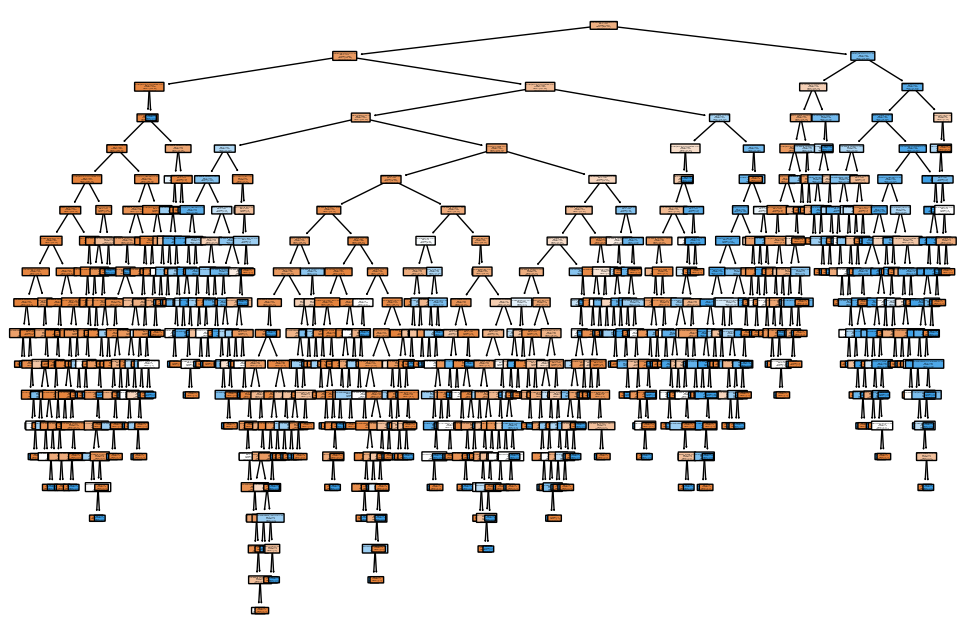

In [114]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=x.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()


## 3.Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
model_rf = RandomForestClassifier(random_state=30)

In [117]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=30)

In [118]:
y_pred_rf=model_rf.predict(x_test)

In [119]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1576
           1       0.89      0.74      0.81       537

    accuracy                           0.91      2113
   macro avg       0.90      0.85      0.87      2113
weighted avg       0.91      0.91      0.91      2113

Confusion Matrix:
[[1526   50]
 [ 139  398]]


### Feature Importance

In [32]:
# Access feature importances
feature_importances = model_rf.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                            Feature  Importance
3       Total Customer Svc Requests    0.163248
1                    Monthly Charge    0.084578
2             Total Regular Charges    0.071022
4   Product/Service Issues Reported    0.066797
43          Contract_Month-to-Month    0.063645
..                              ...         ...
7          Tenure in Months_25 - 36    0.004098
17                 Phone Service_No    0.003636
18                Phone Service_Yes    0.003114
14                    Offer_Offer C    0.002979
12                    Offer_Offer A    0.001645

[61 rows x 2 columns]


## 4.Support Vector Machine Model

In [86]:
model_svm = SVC(kernel='linear', random_state=30)  # You can also try other kernels like 'rbf' or 'poly'
model_svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=30)

In [120]:
y_pred_svm = model_svm.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [121]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {svm_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1576
           1       0.87      0.78      0.82       537

    accuracy                           0.91      2113
   macro avg       0.90      0.87      0.88      2113
weighted avg       0.91      0.91      0.91      2113

Confusion Matrix:
[[1512   64]
 [ 116  421]]


## 5.K-Nearest Neighbors (KNN)

In [91]:
model = KNeighborsClassifier(n_neighbors=6)  
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [122]:
y_pred_knn = model.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [123]:
# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {knn_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1576
           1       0.81      0.59      0.68       537

    accuracy                           0.86      2113
   macro avg       0.84      0.77      0.80      2113
weighted avg       0.86      0.86      0.85      2113

Confusion Matrix:
[[1500   76]
 [ 219  318]]


KNN given an accuracy of 86%

## 6.Gradient Boosting(XGBoost)

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [165]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 1, 0, 0])

In [166]:
# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {xgb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1576
           1       0.87      0.80      0.83       537

    accuracy                           0.92      2113
   macro avg       0.90      0.88      0.89      2113
weighted avg       0.92      0.92      0.92      2113

Confusion Matrix:
[[1510   66]
 [ 108  429]]


In [167]:
# Access feature importances
feature_importances = model_xgb.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                        Feature  Importance
43      Contract_Month-to-Month    0.206961
3   Total Customer Svc Requests    0.117368
21          Internet Service_No    0.067113
45            Contract_Two Year    0.063379
55            Senior Citizen_No    0.055840
..                          ...         ...
26           Internet Type_None    0.000000
22         Internet Service_Yes    0.000000
20           Multiple Lines_Yes    0.000000
18            Phone Service_Yes    0.000000
60               Dependents_Yes    0.000000

[61 rows x 2 columns]


**Gradient Boosting(XGBoost) got 92% accuracy**

## 7.Naive Bayes Model

In [127]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)


GaussianNB()

In [128]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [129]:
# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {nb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1576
           1       0.61      0.82      0.70       537

    accuracy                           0.82      2113
   macro avg       0.77      0.82      0.78      2113
weighted avg       0.85      0.82      0.83      2113

Confusion Matrix:
[[1289  287]
 [  96  441]]


In [130]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest','Gradient Boost','Naive Bayes'],
    'Score': [lr_accuracy, svm_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy,xgb_accuracy,nb_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,0.917653,Gradient Boost
1,0.914813,Support Vector Machine
2,0.911500,Logistic Regression
3,0.910554,Random Forest
4,0.864174,Decision Tree
5,0.860388,K-Nearest Neighbor
6,0.818741,Naive Bayes


In [131]:
#Generate confusion matrix for Gradient Boost model as it has maximum Accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[1510   66]
 [ 108  429]]


In [134]:
# Predict the probability of Churn of each customer
df['Probability of Churn'] = model_xgb.predict_proba(df[x_test.columns])[:,1]

In [137]:
# Create a Dataframe showcasing probability of Churn of each customer
df[['Churn Status','Probability of Churn']].head()

,Churn Status,Probability of Churn
0,1,0.999826
1,1,0.995461
2,1,0.914294
3,1,0.964945
4,1,0.957518


In [138]:
df[['Churn Status','Probability of Churn']].tail()

,Churn Status,Probability of Churn
7038,0,0.000392
7039,0,0.000313
7040,0,0.000590
7041,0,0.014016
7042,0,0.000579


In [139]:
df[['Churn Status','Probability of Churn']]

,Churn Status,Probability of Churn
0,1,0.999826
1,1,0.995461
2,1,0.914294
3,1,0.964945
4,1,0.957518
...,...,...
7038,0,0.000392
7039,0,0.000313
7040,0,0.000590
7041,0,0.014016


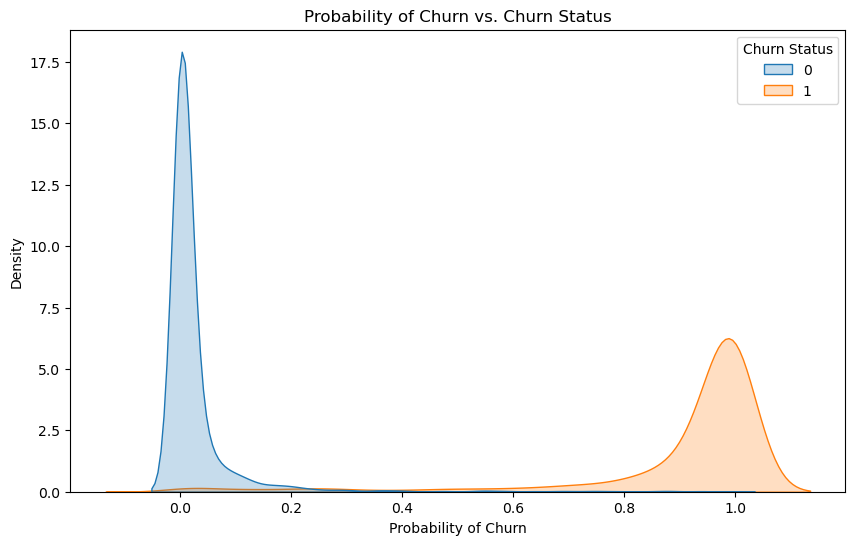

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Probability of Churn', hue='Churn Status', fill=True, common_norm=False)
plt.title('Probability of Churn vs. Churn Status')
plt.xlabel('Probability of Churn')
plt.ylabel('Density')
plt.show()

### Pickling the model

In [141]:
import pickle

In [142]:
filename = 'model_xgb.sav'

In [143]:
pickle.dump(model_rf, open(filename, 'wb'))

In [144]:
load_model = pickle.load(open(filename, 'rb'))

In [148]:
model_score_xgb = load_model.score(x_test, y_test)

In [149]:
model_score_xgb

0.9105537150970184

### Our final model i.e. Gradient Boosting, is now ready and dumped in model_xgb.sav, which can be used later.